In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [3]:
folder = os.path.join('activations', 'activations_minist_model.csv')
df = pd.read_csv(folder)
df.head()

,Number,Layer1_Neuron1,Layer1_Neuron2,Layer1_Neuron3,Layer1_Neuron4,Layer1_Neuron5,Layer1_Neuron6,Layer1_Neuron7,Layer1_Neuron8,Layer1_Neuron9,...,Layer3_Neuron1,Layer3_Neuron2,Layer3_Neuron3,Layer3_Neuron4,Layer3_Neuron5,Layer3_Neuron6,Layer3_Neuron7,Layer3_Neuron8,Layer3_Neuron9,Layer3_Neuron10
0,7.0,0.000000,0.000000,0.000000,0.399097,0.000000,0.000000,0.000000,0.000000,0.000000,...,-22.055817,-17.074514,-12.136678,-11.195572,-25.313034,-18.126488,-34.183750,-0.000019,-16.948915,-15.565269
1,2.0,0.000000,0.000000,3.122375,2.949144,2.404661,1.715258,0.338522,0.128126,1.610624,...,-15.903490,-8.095853,-0.000322,-11.127125,-27.803934,-17.198702,-14.273718,-19.698458,-13.450046,-30.231627
2,1.0,1.827291,1.748518,0.699948,0.539016,0.000000,0.628443,0.588888,0.000000,0.020213,...,-16.210146,-0.000385,-11.081397,-12.736809,-10.941203,-11.521659,-11.719425,-8.667583,-8.749459,-14.620137
3,0.0,0.000000,0.000000,0.614674,0.000000,1.043494,0.438858,0.000000,3.829711,2.498251,...,-0.000426,-13.427382,-9.176719,-14.582230,-15.579443,-13.185836,-8.165977,-12.736848,-13.246180,-10.434205
4,4.0,0.000000,0.000000,1.187802,0.092359,0.000000,0.000000,0.000000,2.307845,1.650951,...,-13.418967,-15.270522,-12.993325,-18.622927,-0.005147,-10.958460,-15.022395,-10.377352,-9.788157,-5.293344


In [4]:
def get_layer_columns(layer):
    layer_columns = ['Number']
    layer_columns += [c for c in df.columns if layer in c]
    return layer_columns

# create new dataframe
df_layer1 = df[get_layer_columns('Layer1')]
df_layer1.head()

# create new dataframe
df_layer2 = df[get_layer_columns('Layer2')]
df_layer2.head()

# create new dataframe
df_layer3 = df[get_layer_columns('Layer3')]
df_layer3.head()

,Number,Layer3_Neuron1,Layer3_Neuron2,Layer3_Neuron3,Layer3_Neuron4,Layer3_Neuron5,Layer3_Neuron6,Layer3_Neuron7,Layer3_Neuron8,Layer3_Neuron9,Layer3_Neuron10
0,7.0,-22.055817,-17.074514,-12.136678,-11.195572,-25.313034,-18.126488,-34.183750,-0.000019,-16.948915,-15.565269
1,2.0,-15.903490,-8.095853,-0.000322,-11.127125,-27.803934,-17.198702,-14.273718,-19.698458,-13.450046,-30.231627
2,1.0,-16.210146,-0.000385,-11.081397,-12.736809,-10.941203,-11.521659,-11.719425,-8.667583,-8.749459,-14.620137
3,0.0,-0.000426,-13.427382,-9.176719,-14.582230,-15.579443,-13.185836,-8.165977,-12.736848,-13.246180,-10.434205
4,4.0,-13.418967,-15.270522,-12.993325,-18.622927,-0.005147,-10.958460,-15.022395,-10.377352,-9.788157,-5.293344


In [41]:
def plot_mean_and_std_bar_per_number(df: pd.DataFrame, title: str, numbers: list):
    if not numbers:
        raise ValueError('You must provide at least one number')

    for num in numbers:
        plt.figure(figsize=(20, 10))

        # Seleccionar las filas para cada número
        df_num = df[df['Number'] == num]
        df_num = df_num.drop(columns=['Number'])

        # Calcular la media y la desviación estándar
        mean = df_num.mean().sort_values(ascending=False)
        std = df_num.std()[mean.index]  # Asegurarse de que std corresponda a la media ordenada

        # Índices de las barras
        bar_indexes = range(1, len(mean) + 1)

        # Graficar la media y la desviación estándar
        plt.bar(bar_indexes, mean, yerr=std, label=f'Number {num}', alpha=0.7)
        plt.title(f'{title} - Number {num}')
        # get number of neurons per layer
        labels = [re.findall(r'\d+', c)[1] for c in mean.index]
        plt.xticks(ticks=bar_indexes, labels=labels, rotation=90)
        plt.legend()
        plt.show()

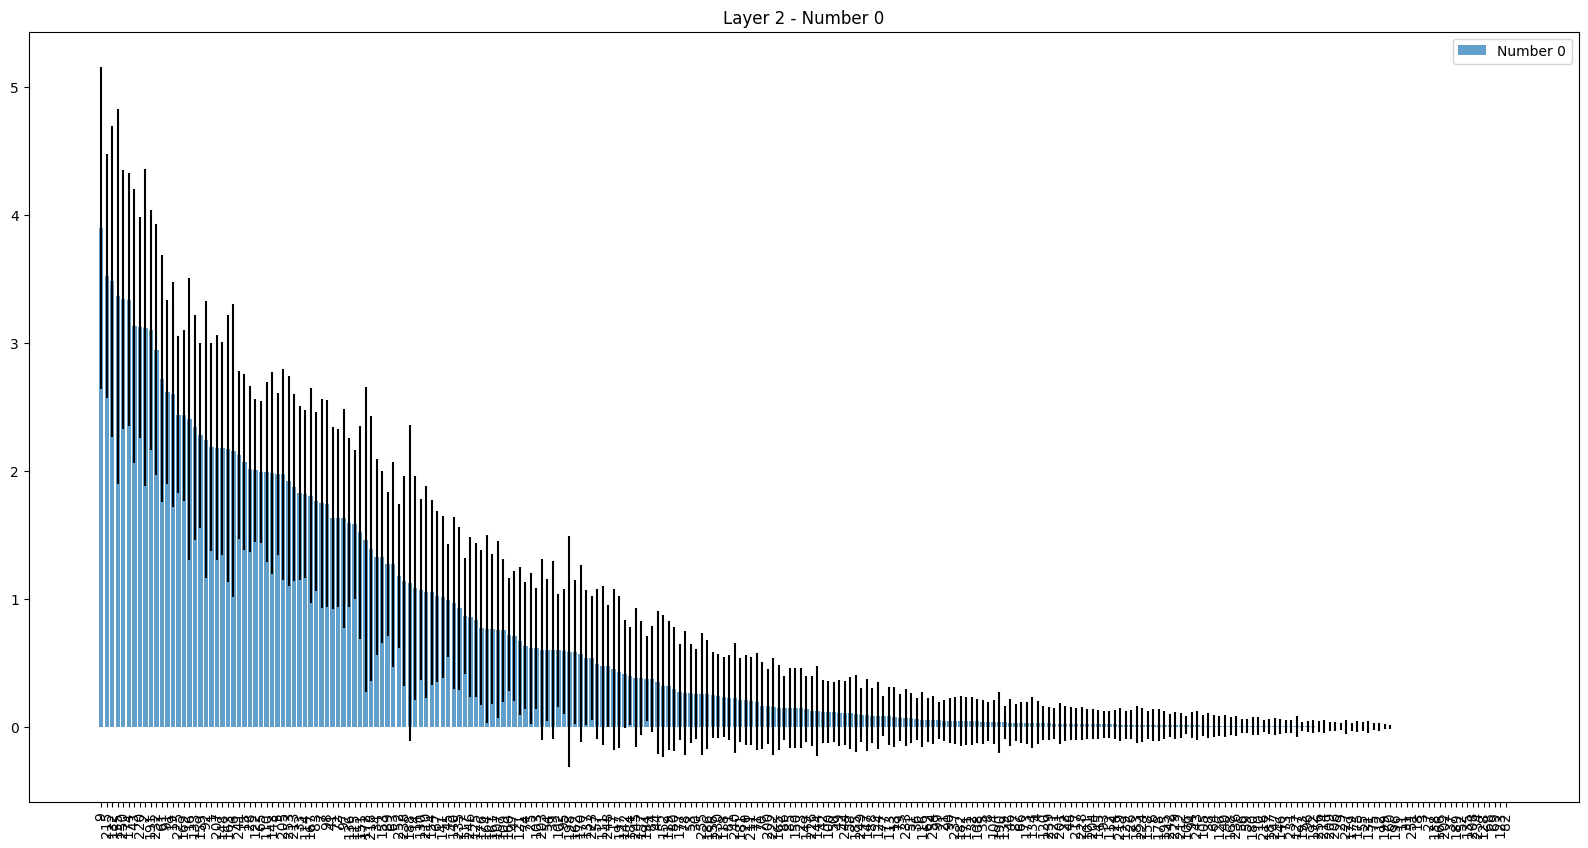

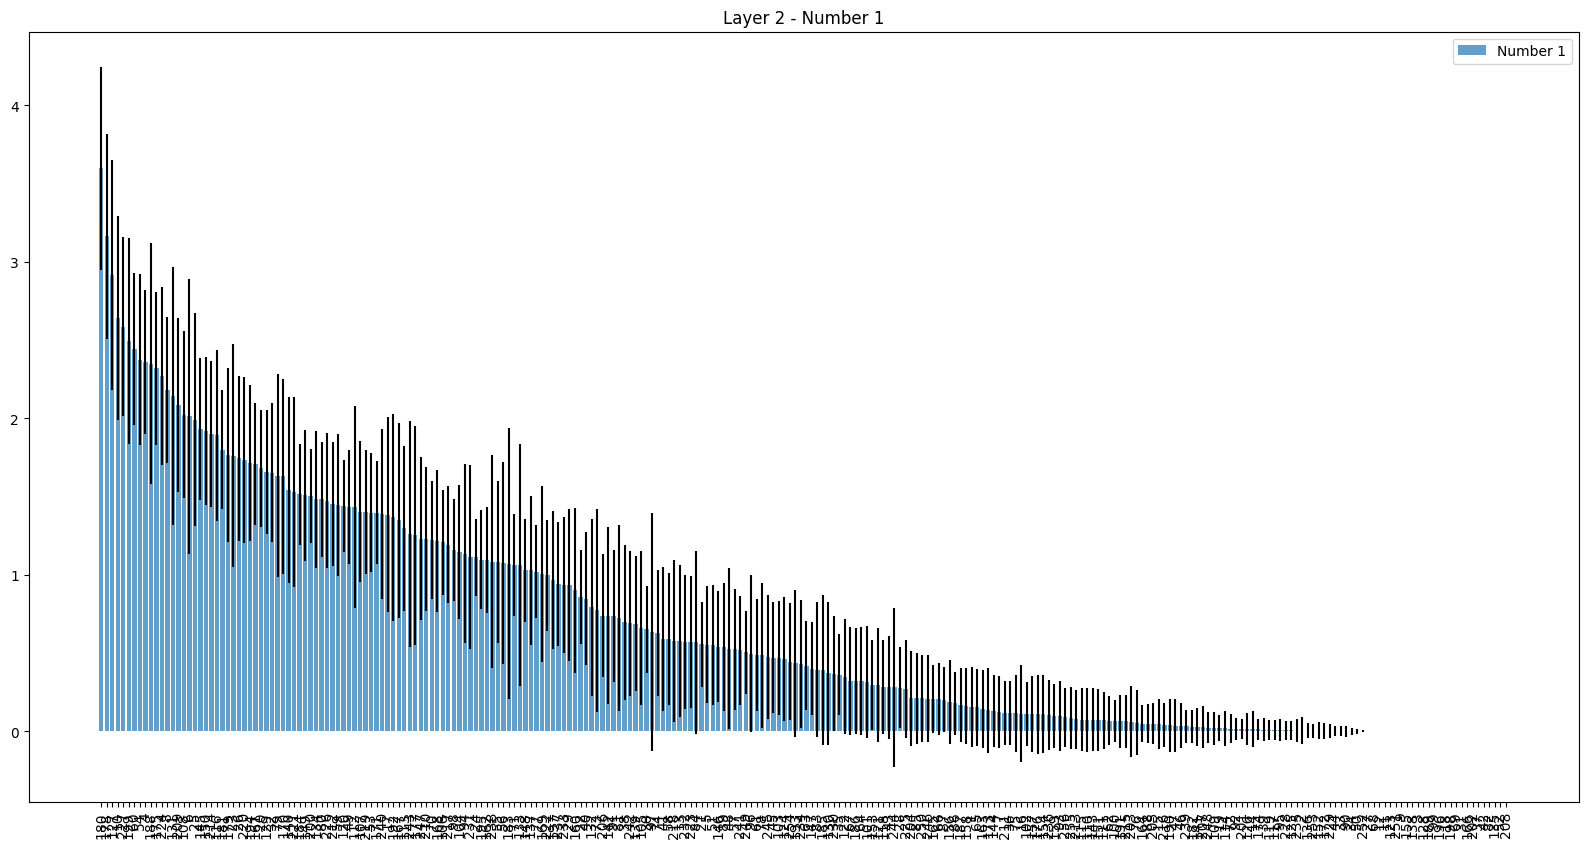

In [43]:
numbers = [0,1]
plot_mean_and_std_bar_per_number(df_layer2, 'Layer 2', numbers)

## GPT-2

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [36]:
def get_layer_columns(layer):
    layer_columns = [c for c in df.columns if layer in c]
    return layer_columns

In [30]:
folder = os.path.join('activations', 'gpt2.pickle')
df = pd.read_pickle(folder)
df.head()


,Input_text,Output_text,layer_1_Neuron1,layer_1_Neuron2,layer_1_Neuron3,layer_1_Neuron4,layer_1_Neuron5,layer_1_Neuron6,layer_1_Neuron7,layer_1_Neuron8,...,layer_12_Neuron3063,layer_12_Neuron3064,layer_12_Neuron3065,layer_12_Neuron3066,layer_12_Neuron3067,layer_12_Neuron3068,layer_12_Neuron3069,layer_12_Neuron3070,layer_12_Neuron3071,layer_12_Neuron3072
0,The dog is,The dog is ALSO,-0.009121,0.021293,-0.005386,0.0209,-0.006832,-0.008365,0.02773,-0.008212,...,0.042299,-0.000772,0.035842,0.001816,0.004044,-0.007056,-0.001496,-0.005639,-0.009413,-0.008969
1,The cat is,The cat is EW,-0.009121,0.021293,-0.005386,0.0209,-0.006832,-0.008365,0.02773,-0.008212,...,0.042299,-0.000772,0.035842,0.001816,0.004044,-0.007056,-0.001496,-0.005639,-0.009413,-0.008969
2,The dog is cute,The dog is cuteore,-0.009121,0.021293,-0.005386,0.0209,-0.006832,-0.008365,0.02773,-0.008212,...,0.042299,-0.000772,0.035842,0.001816,0.004044,-0.007056,-0.001496,-0.005639,-0.009413,-0.008969
3,The cat is cute,The cat is cute EW,-0.009121,0.021293,-0.005386,0.0209,-0.006832,-0.008365,0.02773,-0.008212,...,0.042299,-0.000772,0.035842,0.001816,0.004044,-0.007056,-0.001496,-0.005639,-0.009413,-0.008969
4,The dog is cute and,The dog is cute and daylight,-0.009121,0.021293,-0.005386,0.0209,-0.006832,-0.008365,0.02773,-0.008212,...,0.042299,-0.000772,0.035842,0.001816,0.004044,-0.007056,-0.001496,-0.005639,-0.009413,-0.008969


In [18]:
def plot_mean_and_std_bar_per_number(df: pd.DataFrame, title: str, inputs: list):
    if not inputs:
        raise ValueError('You must provide at least one input')

    for text in inputs:
        plt.figure(figsize=(20, 10))

        # Seleccionar las filas para cada número
        df_num = df[df['Input_text'] == text]
        df_num = df_num.drop(columns=['Input_text'])
        df_num = df_num.drop(columns=['Output_text'])

        # Calcular la media y la desviación estándar
        mean = df_num.mean().sort_values(ascending=False)
        std = df_num.std()[mean.index]  # Asegurarse de que std corresponda a la media ordenada

        # Índices de las barras
        bar_indexes = range(1, len(mean) + 1)

        # Graficar la media y la desviación estándar
        plt.bar(bar_indexes, mean, yerr=std, label=f'Input {text}', alpha=0.7)
        plt.title(f'{title} - Input {text}')
        # get number of neurons per layer
        # labels = [re.findall(r'\d+', c)[1] for c in mean.index]
        #plt.xticks(ticks=bar_indexes, labels=labels, rotation=90)
        plt.legend()
        plt.show()

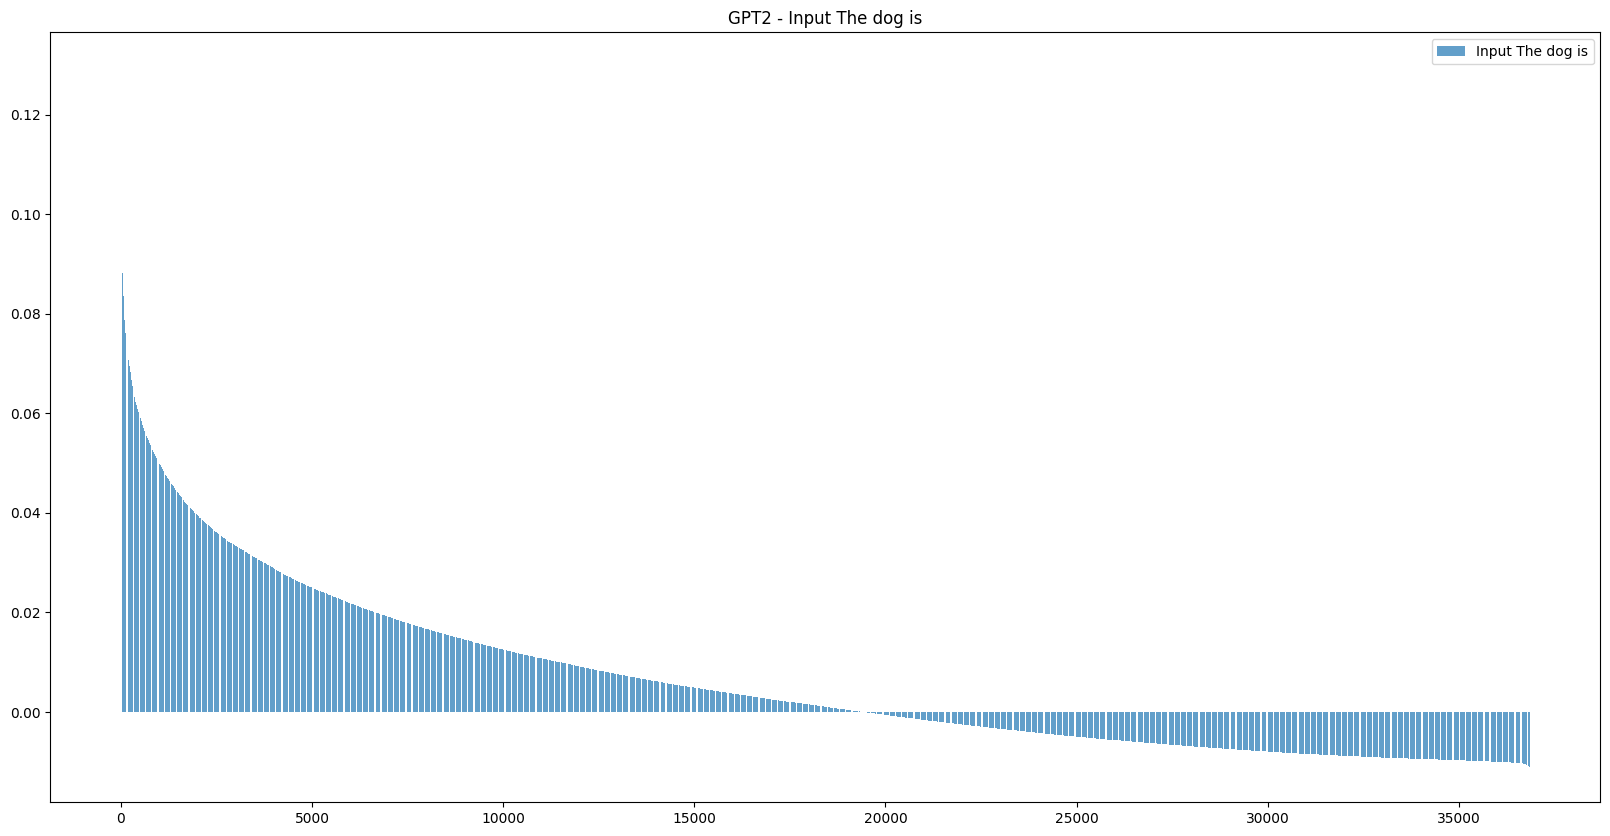

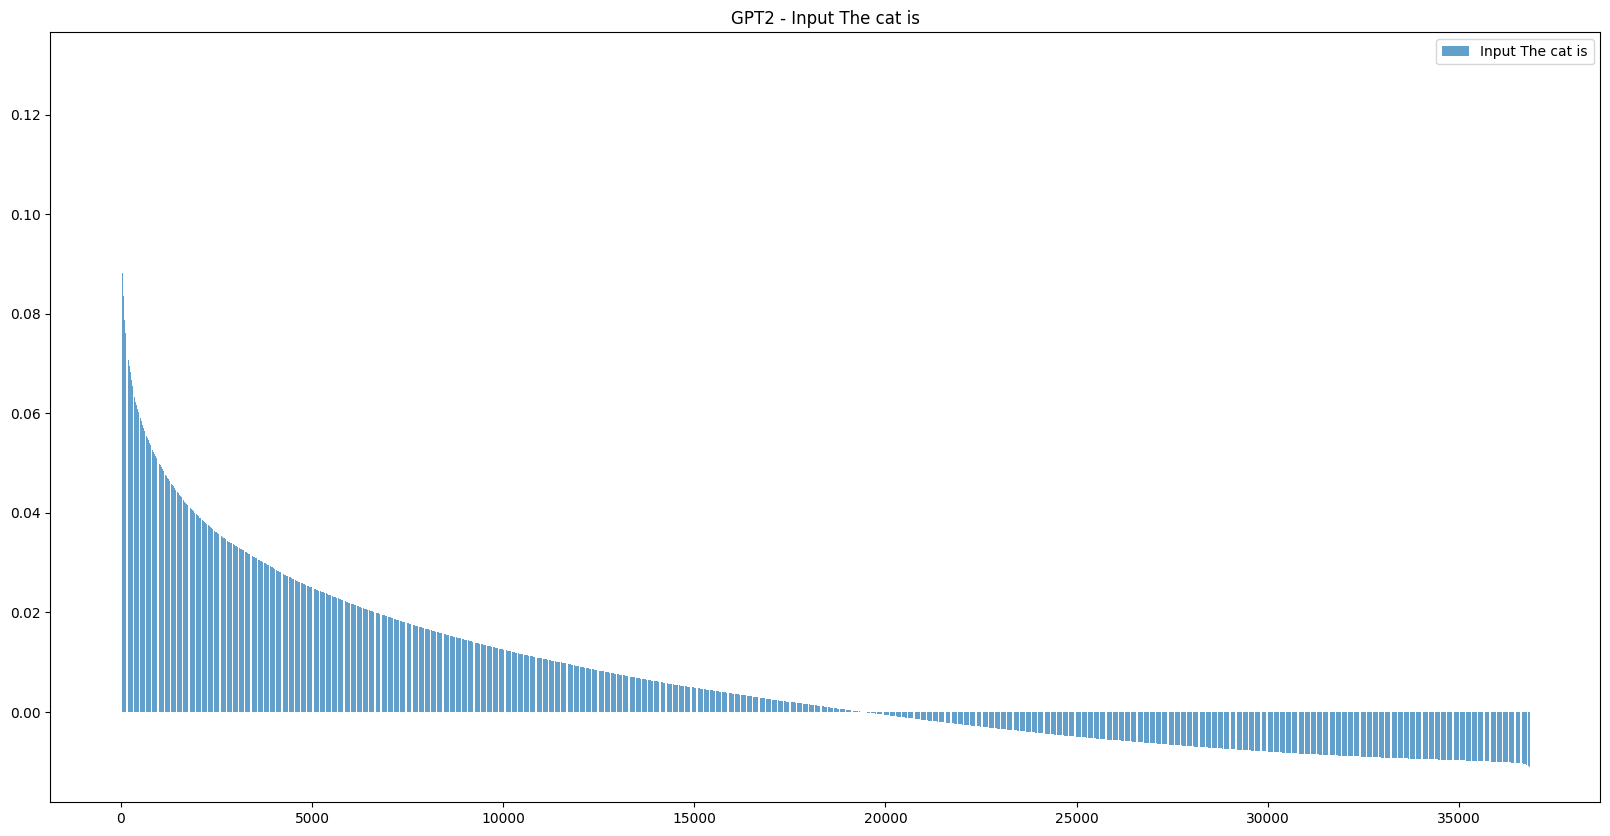

In [19]:
example = ['The dog is', 'The cat is']
plot_mean_and_std_bar_per_number(df, 'GPT2', example)

In [48]:
# split dataframe into layers 
layers_activations = []
for i in range(1,12):
    layers_activations.append(df[get_layer_columns(f'layer_{i}')])
    # add last column with input text
    layers_activations[i-1]['Input_text'] = df.index

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25780\2418565308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers_activations[i-1]['Input_text'] = df.index
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25780\2418565308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers_activations[i-1]['Input_text'] = df.index
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25780\2418565308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [49]:
def plot_tsne(df: pd.DataFrame, title: str):
    plt.figure(figsize=(20, 10))
    tsne = TSNE(n_components=2, random_state=42)
    tsne_df = tsne.fit_transform(df)
    sns.scatterplot(tsne_df)
    plt.title(title)
    plt.show()

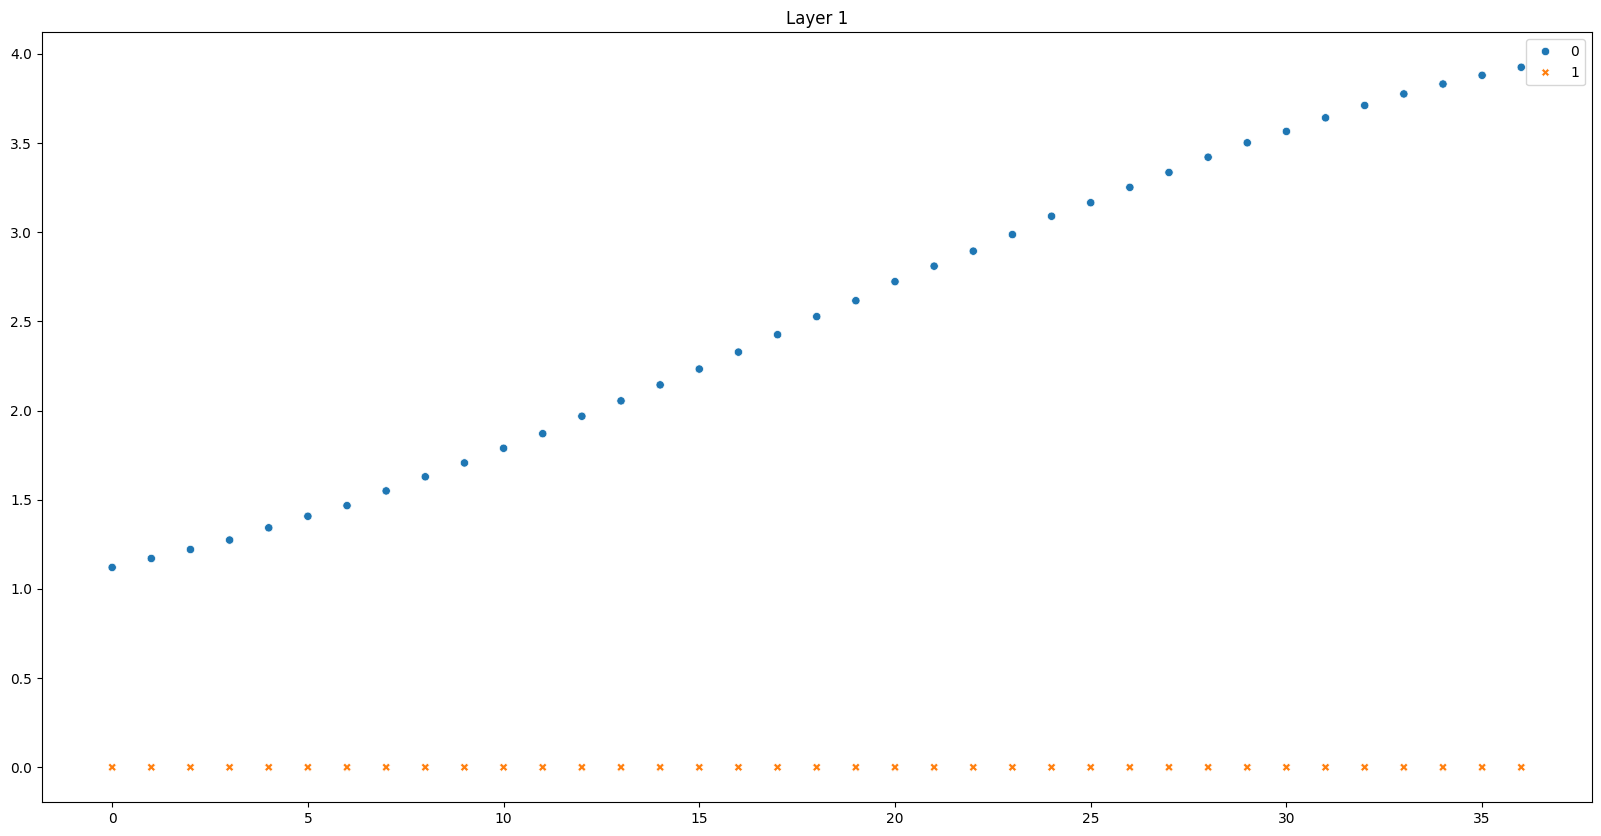

In [50]:
plot_tsne(layers_activations[0], 'Layer 1')